In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 


In [7]:
def metrics(y_test, y_pred):
    class_report = classification_report(y_test,y_pred)
    print(f"Class report:{class_report}")

    cm =confusion_matrix(y_test,y_pred)
    matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
    matrix.plot(cmap='viridis')

In [8]:
df = pd.read_csv('used_cars.csv')

In [9]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [13]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [14]:
empty_fuel_type_rows = df[df['fuel_type'].isnull()]

if not empty_fuel_type_rows.empty:
    brands_and_models = empty_fuel_type_rows[['brand', 'model']]
    print(brands_and_models)

        brand                    model
9       Tesla  Model X Long Range Plus
44      Lucid        Air Grand Touring
68      Lucid        Air Grand Touring
92     Rivian    R1S Adventure Package
122    Rivian    R1S Adventure Package
...       ...                      ...
3908    Tesla       Model Y Long Range
3913    Tesla             Model S 100D
3932    Tesla      Model X Performance
3961    Tesla       Model 3 Long Range
4006  Porsche                   Taycan

[170 rows x 2 columns]


In [15]:
df['fuel_type'].fillna('Electric',inplace=True)

C:\Users\gergo\AppData\Local\Temp\ipykernel_3288\2847175466.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna('Electric',inplace=True)


In [16]:
not_supported_fuel_type_rows = df[df['fuel_type']=='not supported']

if not not_supported_fuel_type_rows.empty:
    brands_and_models = not_supported_fuel_type_rows[['brand', 'model']]
    print(brands_and_models)

       brand          model
2894  Toyota  Mirai Limited
3700  Toyota     Mirai Base


In [17]:
df['fuel_type'].replace({'not supported','Hydrogen'}, inplace= True)

C:\Users\gergo\AppData\Local\Temp\ipykernel_3288\1526577998.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['fuel_type'].replace({'not supported','Hydrogen'}, inplace= True)


In [18]:
not_supported_fuel_type_rows = df[df['fuel_type']=='–']

if not not_supported_fuel_type_rows.empty:
    brands_and_models = not_supported_fuel_type_rows[['brand', 'model']]
    print(brands_and_models)

              brand                          model
130        Chrysler               Pacifica Touring
257          Toyota              Land Cruiser Base
338           Mazda         Mazda3 s Grand Touring
491        Chrysler               Pacifica Touring
692           Honda                       Civic EX
855            Ford                         Bronco
923           Dodge                 Challenger R/T
995           Dodge       Challenger R/T Scat Pack
1063          Mazda         Mazda6 i Grand Touring
1083          Dodge                 Challenger R/T
1084      Chevrolet                       Sonic LT
1088          Mazda                MX-5 Miata Base
1134  Mercedes-Benz                   E-Class 400E
1269          Dodge       Challenger R/T Scat Pack
1294      Chevrolet     1500 Cheyenne Extended Cab
1355         Toyota              Land Cruiser Base
1615    Rolls-Royce                        Phantom
1643           Ford       Mustang EcoBoost Premium
1681          Acura            

In [19]:
df['fuel_type'].replace({'–','LPG'}, inplace= True)

C:\Users\gergo\AppData\Local\Temp\ipykernel_3288\727294703.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['fuel_type'].replace({'–','LPG'}, inplace= True)


In [20]:
df['clean_title'].value_counts()

clean_title
Yes    3413
Name: count, dtype: int64

In [21]:
df['clean_title'].fillna('no',inplace=True)

C:\Users\gergo\AppData\Local\Temp\ipykernel_3288\3619315931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clean_title'].fillna('no',inplace=True)


In [22]:
df['accident'].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [23]:
df['accident'].fillna('None reported',inplace=True)

C:\Users\gergo\AppData\Local\Temp\ipykernel_3288\1942305989.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['accident'].fillna('None reported',inplace=True)


In [24]:
df['milage']=df['milage'].str.replace(' mi.', '')
df['milage']=df['milage'].str.replace(',', '').astype(float)
#df['milage']=df['milage'].str.replace(',', '.').astype(float) ez volt eddig

In [25]:
df['price']=df['price'].str.replace('$', '')
df['price']=df['price'].str.replace(',', '').astype(float)

In [26]:
import datetime

cur_date = datetime.datetime.now()
df['Age'] = cur_date.year - df['model_year']
df=df.drop(['model_year'], axis=1)

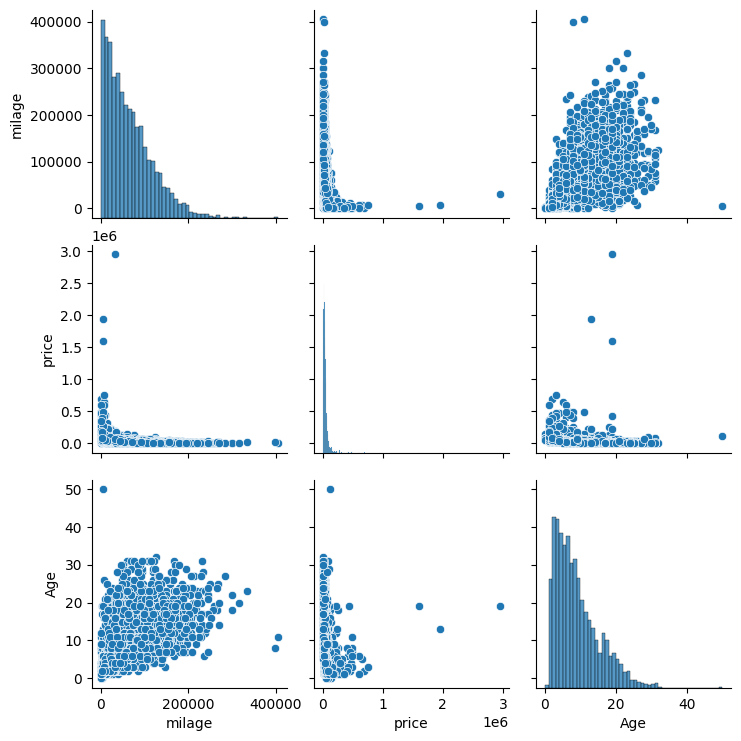

In [27]:
sns.pairplot(df)
plt.show()

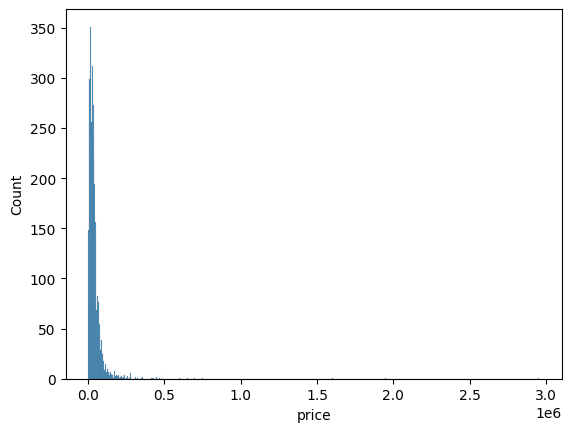

In [28]:
sns.histplot(df['price'])
plt.show()

In [29]:
lower_threshold = df['price'].quantile(0.33)
upper_threshold = df['price'].quantile(0.66)

# Ár feature alapján kategóriák hozzárendelése
def assign_price_category(price):
    if price <= lower_threshold:
        return 0
    elif price <= upper_threshold:
        return 1
    else:
        return 2

df['price_category'] = df['price'].apply(assign_price_category)

In [30]:
df.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Age,price_category
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,11,0
1,Hyundai,Palisade SEL,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3,1
2,Lexus,RX 350 RX 350,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,no,54598.0,2,2
3,INFINITI,Q50 Hybrid Sport,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,9,0
4,Audi,Q3 45 S line Premium Plus,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,no,34999.0,3,1


In [31]:
df['model'].value_counts()

model
M3 Base                    30
F-150 XLT                  24
Corvette Base              22
1500 Laramie               18
Camaro 2SS                 17
                           ..
XE 25t                      1
MC20 Base                   1
911 Carrera 4 Cabriolet     1
488 GTB Base                1
Taycan                      1
Name: count, Length: 1898, dtype: int64

In [32]:
df['transmission'].unique()

array(['6-Speed A/T', '8-Speed Automatic', 'Automatic', '7-Speed A/T',
       'F', 'A/T', '8-Speed A/T', 'Transmission w/Dual Shift Mode',
       '9-Speed Automatic', '6-Speed M/T', '10-Speed A/T', '9-Speed A/T',
       '5-Speed A/T', '1-Speed A/T', 'Automatic CVT',
       '7-Speed Automatic with Auto-Shift', 'CVT-F', 'M/T',
       '6-Speed Automatic with Auto-Shift', '10-Speed Automatic',
       'CVT Transmission', '4-Speed A/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T',
       '8-Speed Automatic with Auto-Shift', '5-Speed Automatic',
       '8-SPEED AT', '1-Speed Automatic', '5-Speed M/T', 'Manual',
       '6-Speed Manual', 'Variable', '2', '7-Speed Manual',
       'Automatic, 9-Spd 9G-Tronic', 'Automatic, 8-Spd',
       'Automatic, 8-Spd Sport w/Sport & Manual Modes', '–',
       'Auto, 6-Spd w/CmdShft', 'Transmission Overdrive Switch',
       '7-Speed Automatic', 'Automatic, 8-Spd PDK Dual-Clutch',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Ma

In [33]:
transmission_mapping = {
    '6-Speed A/T': 'Automatic',
    '8-Speed Automatic': 'Automatic',
    'Automatic': 'Automatic',
    '7-Speed A/T': 'Automatic',
    'A/T': 'Automatic',
    '8-Speed A/T': 'Automatic',
    'Transmission w/Dual Shift Mode': 'Automatic',
    '9-Speed Automatic': 'Automatic',
    '10-Speed Automatic': 'Automatic',
    'Automatic CVT': 'CVT',
    'CVT Transmission': 'CVT',
    'CVT-F': 'CVT',
    '7-Speed Automatic': 'Automatic',
    '6-Speed M/T': 'Manual',
    '7-Speed M/T': 'Manual',
    '6-Speed Manual': 'Manual',
    '5-Speed M/T': 'Manual',
    'Manual': 'Manual',
    '7-Speed Manual': 'Manual',
    '8-Speed Manual': 'Manual',
    'M/T': 'Manual',
    '6-Speed Automatic with Auto-Shift': 'Automatic',
    '8-Speed Automatic with Auto-Shift': 'Automatic',
    '9-Speed Automatic with Auto-Shift': 'Automatic',
    '5-Speed Automatic': 'Automatic',
    '4-Speed A/T': 'Automatic',
    '4-Speed Automatic': 'Automatic',
    '10-Speed A/T': 'Automatic',
    '5-Speed A/T': 'Automatic',
    '1-Speed A/T': 'Automatic',
    '2-Speed Automatic': 'Automatic',
    '6-Speed Electronically Controlled Automatic with O': 'Automatic',
    'Single-Speed Fixed Gear': 'Automatic',
    '7-Speed DCT Automatic': 'Automatic',
    '8-SPEED AT': 'Automatic',
    '8-SPEED A/T': 'Automatic',
    '10-Speed Automatic with Overdrive': 'Automatic',
    'Automatic, 9-Spd 9G-Tronic': 'Automatic',
    'Automatic, 8-Spd': 'Automatic',
    'Automatic, 8-Spd Sport w/Sport & Manual Modes': 'Automatic',
    'Automatic, 8-Spd PDK Dual-Clutch': 'Automatic',
    'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes': 'Automatic',
    'Automatic, 8-Spd Dual-Clutch': 'Automatic',
    '2-Speed A/T': 'Automatic',
    '6 Speed At/Mt': 'Manual',
    '6 Speed Mt': 'Manual',
    'Variable': 'Other',
    '2': 'Other',
    '-': 'Other',
    'SCHEDULED FOR OR IN PRODUCTION': 'Other',
    '9-Speed A/T': 'Automatic',
    '6-Speed Automatic': 'Automatic',
    '7-Speed Automatic with Auto-Shift': 'Automatic',
    '1-Speed Automatic': 'Automatic',
    'Manual, 6-Spd': 'Manual',
    'Auto, 6-Spd w/CmdShft': 'Automatic',
    '6-Speed': 'Manual',
    '7-Speed ': 'Manual',
    'Automatic, 10-Spd': 'Automatic',
    'Automatic, 7-Spd S tronic Dual-Clutch': 'Automatic'
}


df['transmission'] = df['transmission'].replace(transmission_mapping)

df['transmission'].value_counts()

transmission
Automatic                        3512
Manual                            375
CVT                               100
Other                               8
Transmission Overdrive Switch       7
–                                   4
F                                   2
7-Speed                             1
Name: count, dtype: int64

In [34]:
def AutomaticOrManual(transmission):
    if 'Automatic' in transmission:
        return 'Automatic'
    elif 'Manual' in transmission:
        return 'Manual'
    else :
        return 'Other'
df['transmission'] = df['transmission'].apply(AutomaticOrManual)
df['transmission'].value_counts()

transmission
Automatic    3512
Manual        375
Other         122
Name: count, dtype: int64

In [35]:
df['engine'].unique()

array(['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability',
       '3.8L V6 24V GDI DOHC', '3.5 Liter DOHC', ...,
       '136.0HP 1.8L 4 Cylinder Engine Gasoline Fuel',
       '270.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel'], dtype=object)

In [36]:
import re

def extract_engine_att(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''


df[['Horsepower', 'Engine_Displacement']] = df['engine'].apply(extract_engine_att).apply(pd.Series)
df=df.drop(['engine'], axis=1)

In [37]:
df['Horsepower'].isnull().sum()

707

In [38]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'])

In [39]:
df['Horsepower'].fillna(df['Horsepower'].mean(),inplace=True)

C:\Users\gergo\AppData\Local\Temp\ipykernel_3288\2941481878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Horsepower'].fillna(df['Horsepower'].mean(),inplace=True)


In [40]:
df['Horsepower'].isnull().sum()

0

In [41]:
df['Engine_Displacement'].unique()

array(['3.7L', '3.8L', '3.5 Liter', '3.5L', '2.0L', '2.4 Liter', '4.4L',
       '', '5.2L', '3.0L', '2.0 Liter', '5.0L', '3.6L', '2.2L',
       '3.0 Liter', '5.3L', '1.8 Liter', '5.7L', '2.4L', '2.7L', '6.0L',
       '4.4 Liter', '4.0L', '1.5L', '6.1L', '1.6L', '2.9L', '3.3L',
       '3.4L', '2.5L', '1.8L', '6.2L', '4.3L', '6.75L', '5.5L', '5.6L',
       '6.3L', '5.4L', '6.7L', '4.6L', '4.5L', '4.7L', '1.3L', '2.3L',
       '3.2L', '4.7 Liter', '5.4 Liter', '5.8L', '5.7 Liter', '1.5 Liter',
       '6.8L', '6.4L', '8.0L', '4.2L', '1.2L', '5.6 Liter', '3.9L',
       '4.0 Liter', '1.7L', '3.6 Liter', '7.0L', '2.8L', '6.6L',
       '6.4 Liter', '1.4L', '4.6 Liter', '4.8L', '7.4L', '5.9L', '8.1L',
       '6.5L', '5.0 Liter', '5.3 Liter', '8.4L', '0.65L', '5.5 Liter',
       '6.6 Liter', '8.3L', '6.2 Liter', '2.1L', '7.3L', '1.0L',
       '2.9 Liter', '2.5 Liter', '2.7 Liter'], dtype=object)

In [42]:
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace('L', '')
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace(' iter', '')
df['Engine_Displacement'] = pd.to_numeric(df['Engine_Displacement'])

In [43]:
df['Engine_Displacement'].unique()

array([3.7 , 3.8 , 3.5 , 2.  , 2.4 , 4.4 ,  nan, 5.2 , 3.  , 5.  , 3.6 ,
       2.2 , 5.3 , 1.8 , 5.7 , 2.7 , 6.  , 4.  , 1.5 , 6.1 , 1.6 , 2.9 ,
       3.3 , 3.4 , 2.5 , 6.2 , 4.3 , 6.75, 5.5 , 5.6 , 6.3 , 5.4 , 6.7 ,
       4.6 , 4.5 , 4.7 , 1.3 , 2.3 , 3.2 , 5.8 , 6.8 , 6.4 , 8.  , 4.2 ,
       1.2 , 3.9 , 1.7 , 7.  , 2.8 , 6.6 , 1.4 , 4.8 , 7.4 , 5.9 , 8.1 ,
       6.5 , 8.4 , 0.65, 8.3 , 2.1 , 7.3 , 1.  ])

In [44]:
electric = df[df['Engine_Displacement'].isnull()]

if not electric.empty:
    brands_and_models = electric[['brand', 'model']]
    print(brands_and_models)

        brand                                         model
9       Tesla                       Model X Long Range Plus
10       Land  Rover Range Rover Sport 3.0 Supercharged HST
32        BMW                     i3 120Ah w/Range Extender
44      Lucid                             Air Grand Touring
68      Lucid                             Air Grand Touring
...       ...                                           ...
3932    Tesla                           Model X Performance
3952    Dodge                         Ram 3500 Quad Cab DRW
3961    Tesla                            Model 3 Long Range
3984   Toyota                             Land Cruiser Base
4006  Porsche                                        Taycan

[238 rows x 2 columns]


In [45]:
df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Age,price_category,Horsepower,Engine_Displacement
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,10300.0,11,0,300.000000,3.7
1,Hyundai,Palisade SEL,34742.0,Gasoline,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3,1,332.283839,3.8
2,Lexus,RX 350 RX 350,22372.0,Gasoline,Automatic,Blue,Black,None reported,no,54598.0,2,2,332.283839,3.5
3,INFINITI,Q50 Hybrid Sport,88900.0,Hybrid,Automatic,Black,Black,None reported,Yes,15500.0,9,0,354.000000,3.5
4,Audi,Q3 45 S line Premium Plus,9835.0,Gasoline,Automatic,Glacier White Metallic,Black,None reported,no,34999.0,3,1,332.283839,2.0


In [46]:
df['base_model'] = df['brand'] + ' ' + df['model'].str.split().str[:1].str.join(' ')

# Egyedi kategóriák azonosítása
df['category_id'] = df['base_model'].astype('category').cat.codes

# Az eredmény mentése Excel fájlba
df.to_excel('output2.xlsx', sheet_name='Autók', index=False)

In [47]:
df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Age,price_category,Horsepower,Engine_Displacement,base_model,category_id
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,10300.0,11,0,300.000000,3.7,Ford Utility,211
1,Hyundai,Palisade SEL,34742.0,Gasoline,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3,1,332.283839,3.8,Hyundai Palisade,247
2,Lexus,RX 350 RX 350,22372.0,Gasoline,Automatic,Blue,Black,None reported,no,54598.0,2,2,332.283839,3.5,Lexus RX,321
3,INFINITI,Q50 Hybrid Sport,88900.0,Hybrid,Automatic,Black,Black,None reported,Yes,15500.0,9,0,354.000000,3.5,INFINITI Q50,259
4,Audi,Q3 45 S line Premium Plus,9835.0,Gasoline,Automatic,Glacier White Metallic,Black,None reported,no,34999.0,3,1,332.283839,2.0,Audi Q3,20


In [48]:
df = df.drop(['model', 'category_id'], axis=1)

In [49]:
df.head()

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Age,price_category,Horsepower,Engine_Displacement,base_model
0,Ford,51000.0,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,10300.0,11,0,300.000000,3.7,Ford Utility
1,Hyundai,34742.0,Gasoline,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3,1,332.283839,3.8,Hyundai Palisade
2,Lexus,22372.0,Gasoline,Automatic,Blue,Black,None reported,no,54598.0,2,2,332.283839,3.5,Lexus RX
3,INFINITI,88900.0,Hybrid,Automatic,Black,Black,None reported,Yes,15500.0,9,0,354.000000,3.5,INFINITI Q50
4,Audi,9835.0,Gasoline,Automatic,Glacier White Metallic,Black,None reported,no,34999.0,3,1,332.283839,2.0,Audi Q3


In [50]:
#electric
df['Engine_Displacement'].fillna(0,inplace=True)

C:\Users\gergo\AppData\Local\Temp\ipykernel_3288\1963821700.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine_Displacement'].fillna(0,inplace=True)


In [51]:
df=df.drop(['ext_col', 'int_col'], axis=1)

C:\Users\gergo\AppData\Local\Temp\ipykernel_3288\3118828959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['brand'].value_counts().index, y = df['brand'].value_counts().values,palette='viridis')


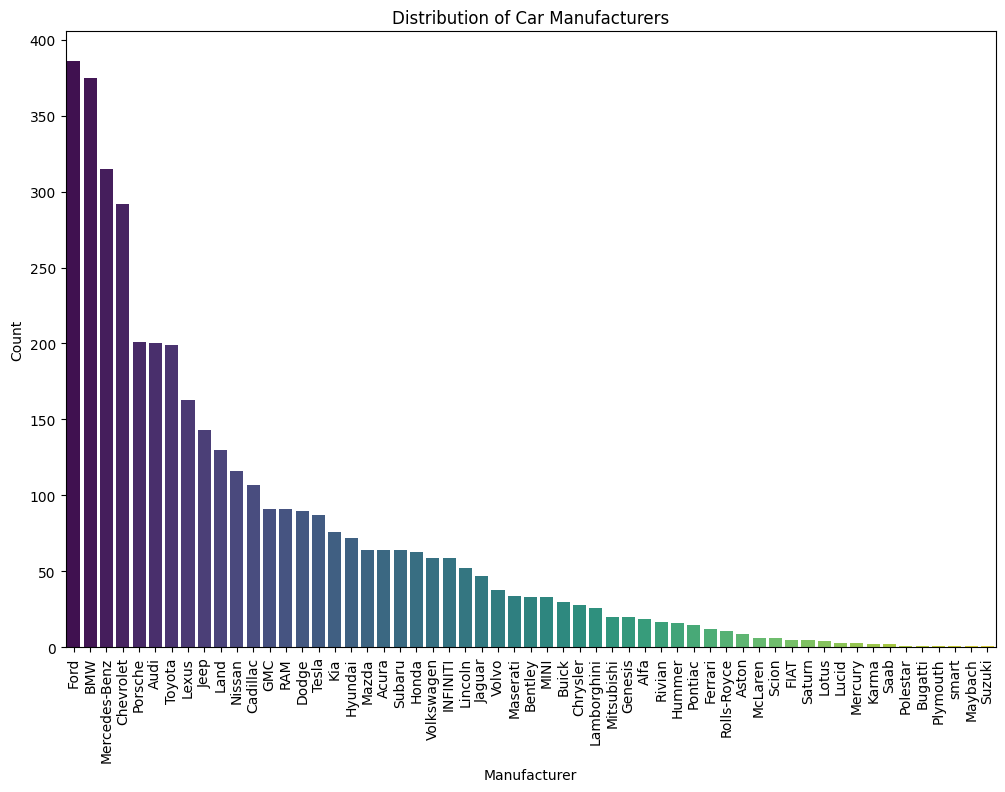

In [52]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['brand'].value_counts().index, y = df['brand'].value_counts().values,palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

In [53]:
df['transmission'] = df['transmission'].replace({'Automatic':1,'Manual':2, 'Other':3})
df['transmission'].value_counts()

C:\Users\gergo\AppData\Local\Temp\ipykernel_3288\1604564939.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['transmission'] = df['transmission'].replace({'Automatic':1,'Manual':2, 'Other':3})


transmission
1    3512
2     375
3     122
Name: count, dtype: int64

In [54]:
df['accident'] = df['accident'].replace({'At least 1 accident or damage reported':1,'None reported':0}) 
df['accident'].value_counts()

C:\Users\gergo\AppData\Local\Temp\ipykernel_3288\3509359896.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['accident'] = df['accident'].replace({'At least 1 accident or damage reported':1,'None reported':0})


accident
0    3023
1     986
Name: count, dtype: int64

In [55]:
df['clean_title'] = df['clean_title'].replace({'Yes':1,'no':0})
df['clean_title'].value_counts()

C:\Users\gergo\AppData\Local\Temp\ipykernel_3288\400681818.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['clean_title'] = df['clean_title'].replace({'Yes':1,'no':0})


clean_title
1    3413
0     596
Name: count, dtype: int64

In [56]:
#le = LabelEncoder()
#categorical_columns = ['brand','fuel_type']
#
#label_encoders = {}
#for col in categorical_columns:
#    le = LabelEncoder()
#    df[col] = le.fit_transform(df[col])
#    label_encoders[col] = le

import joblib

brand_encoder = LabelEncoder()
fuel_type_encoder = LabelEncoder()
base_model_encoder = LabelEncoder()

df['brand'] = brand_encoder.fit_transform(df['brand'])
df['fuel_type'] = fuel_type_encoder.fit_transform(df['fuel_type'])
df['base_model'] = base_model_encoder.fit_transform(df['base_model'])

joblib.dump(brand_encoder, 'brand_encoder.pkl')
joblib.dump(fuel_type_encoder, 'fuel_type_encoder.pkl')
joblib.dump(base_model_encoder, 'base_model_encoder.pkl')

['base_model_encoder.pkl']

In [57]:
df.head()

,brand,milage,fuel_type,transmission,accident,clean_title,price,Age,price_category,Horsepower,Engine_Displacement,base_model
0,14,51000.0,1,1,1,1,10300.0,11,0,300.000000,3.7,211
1,19,34742.0,3,1,1,1,38005.0,3,1,332.283839,3.8,247
2,27,22372.0,3,1,0,0,54598.0,2,2,332.283839,3.5,321
3,20,88900.0,4,1,0,1,15500.0,9,0,354.000000,3.5,259
4,3,9835.0,3,1,0,0,34999.0,3,1,332.283839,2.0,20


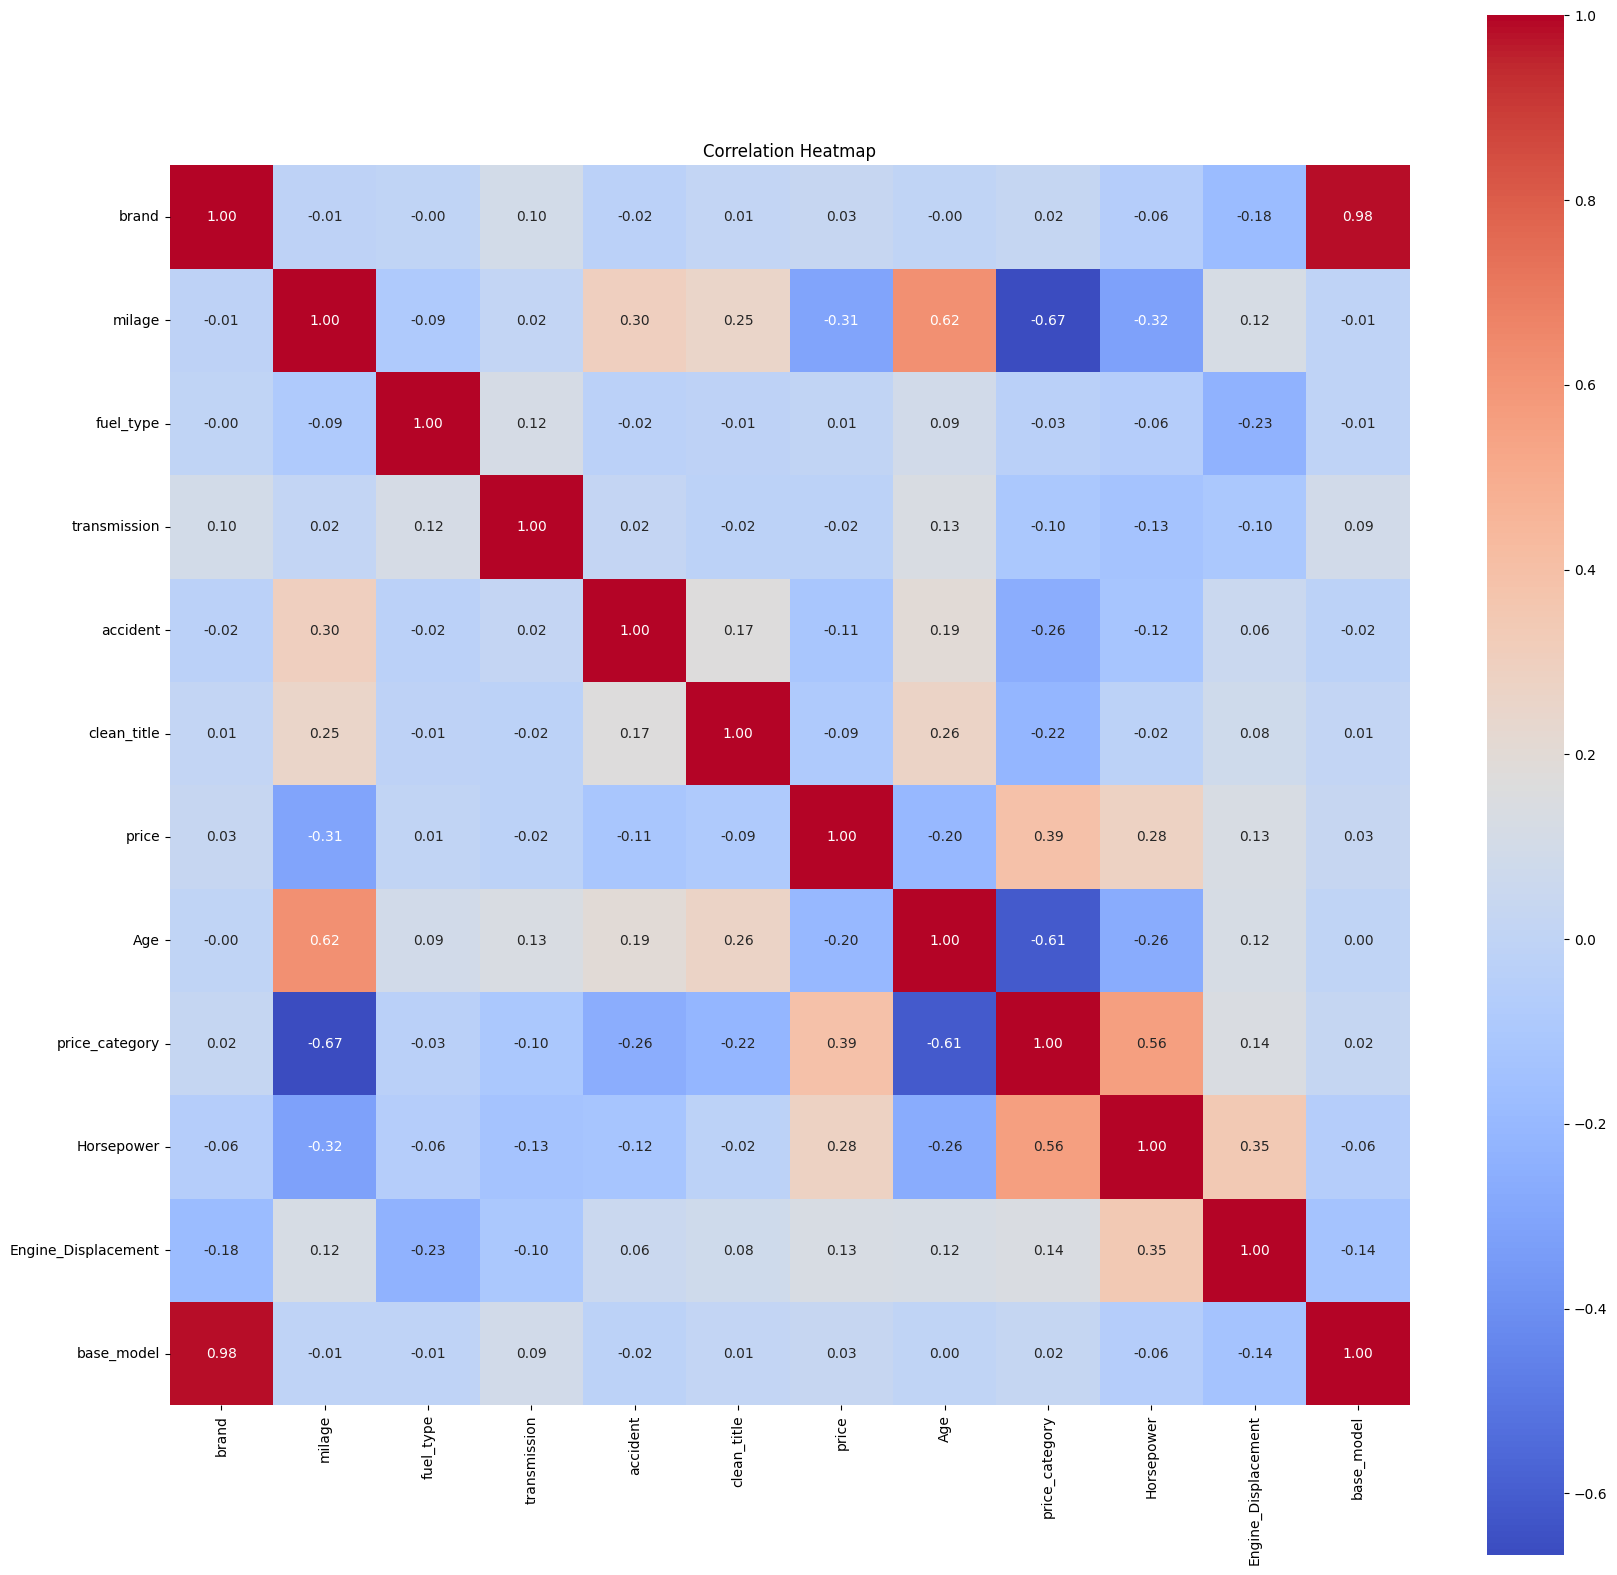

In [58]:
corr_mat=df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [59]:
df.isnull().sum()

brand                  0
milage                 0
fuel_type              0
transmission           0
accident               0
clean_title            0
price                  0
Age                    0
price_category         0
Horsepower             0
Engine_Displacement    0
base_model             0
dtype: int64

In [60]:
df.head()

,brand,milage,fuel_type,transmission,accident,clean_title,price,Age,price_category,Horsepower,Engine_Displacement,base_model
0,14,51000.0,1,1,1,1,10300.0,11,0,300.000000,3.7,211
1,19,34742.0,3,1,1,1,38005.0,3,1,332.283839,3.8,247
2,27,22372.0,3,1,0,0,54598.0,2,2,332.283839,3.5,321
3,20,88900.0,4,1,0,1,15500.0,9,0,354.000000,3.5,259
4,3,9835.0,3,1,0,0,34999.0,3,1,332.283839,2.0,20


In [64]:
X = df.drop(['price', 'price_category', 'base_model', 'fuel_type', 'transmission', 'accident', 'clean_title'],axis=1)
y = df['price_category']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
X['adjusted_milage'] = X['milage'] / (X['brand'] + 1)  # Példa súlyozott futásteljesítményre
X['milage_per_year'] = X['milage'] / (X['Age'] + 1)

In [73]:
X = X.drop(['milage'], axis=1)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Klasszifikációs modellek kiértékelése
def evaluate_classifiers(X_train, X_test, y_train, y_test):

    # Modellek listája
    models = {
        'LogisticRegression': LogisticRegression(max_iter=1000),
        'DecisionTreeClassifier': DecisionTreeClassifier(),
        'RandomForestClassifier': RandomForestClassifier(),
        'ExtraTreesClassifier': ExtraTreesClassifier(),
        'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        'CatBoostClassifier': CatBoostClassifier(verbose=0)
    }

    results = []
    for name, model in models.items():
        # Modell tanítása
        model.fit(X_train, y_train)
        # Predikció teszt adatokra
        y_pred = model.predict(X_test)
        # Pontosság számítása
        accuracy = accuracy_score(y_test, y_pred)
        results.append({"name": name, "Model": model, "accuracy": accuracy})
    
    # Eredmények DataFrame-ben
    df_results = pd.DataFrame(results).sort_values(by=['accuracy'], ascending=False, ignore_index=True)
    return df_results

# Kiértékelés
df_scores = evaluate_classifiers(X_train, X_test, y_train, y_test)
print(df_scores)


C:\Users\gergo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gergo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [22:51:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings

                     name                                              Model  \
0      CatBoostClassifier  <catboost.core.CatBoostClassifier object at 0x...   
1           XGBClassifier  XGBClassifier(base_score=None, booster=None, c...   
2    ExtraTreesClassifier  (ExtraTreeClassifier(random_state=902231327), ...   
3  RandomForestClassifier  (DecisionTreeClassifier(max_features='sqrt', r...   
4  DecisionTreeClassifier                           DecisionTreeClassifier()   
5      LogisticRegression                  LogisticRegression(max_iter=1000)   

   accuracy  
0  0.827930  
1  0.824190  
2  0.812968  
3  0.804239  
4  0.764339  
5  0.731920  


Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\gergo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [22:52:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Legjobb paraméterek: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Legjobb pontosság: 0.8307
Class report:              precision    recall  f1-score   support

           0       0.86      0.89      0.88       269
           1       0.75      0.76      0.75       269
           2       0.88      0.83      0.86       264

    accuracy                           0.83       802
   macro avg       0.83      0.83      0.83       802
weighted avg       0.83      0.83      0.83       802



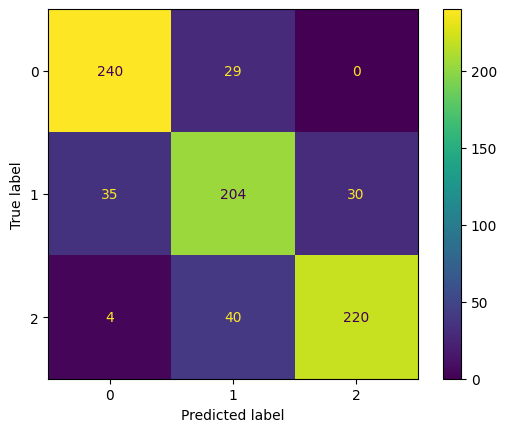

In [75]:
# Paraméterek rácsa
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV objektum
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-szoros keresztvalidáció
    verbose=1,  # Folyamatjelentés
    n_jobs=-1   # Párhuzamos feldolgozás
)

# Modell optimalizálása
grid_search.fit(X_train, y_train)

# Legjobb paraméterek és pontosság
print("Legjobb paraméterek:", grid_search.best_params_)
print(f"Legjobb pontosság: {grid_search.best_score_:.4f}")

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
metrics(y_test, y_pred)

In [ ]:
param_grid = {
    'iterations': [100, 200, 500],  # Tanítási iterációk száma
    'learning_rate': [0.01, 0.1, 0.2],  # Tanulási ráta
    'depth': [4, 6, 8],  # Fa mélysége
    'l2_leaf_reg': [1, 3, 5],  # L2 reguláció erőssége
    'border_count': [32, 64, 128]  # Bináris jellemzők számának korlátozása
}

# GridSearchCV konfiguráció
grid_search = GridSearchCV(
    estimator=CatBoostClassifier(verbose=0, random_state=42),  # Csendes mód
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-szoros keresztvalidáció
    verbose=1,
    n_jobs=-1  # Párhuzamos futtatás
)

# GridSearch futtatása
grid_search.fit(X_train, y_train)

# Legjobb paraméterek és pontosság
print("Legjobb paraméterek:", grid_search.best_params_)
print(f"Legjobb pontosság: {grid_search.best_score_:.4f}")


best_cat = grid_search.best_estimator_
y_pred = best_cat.predict(X_test)
metrics(y_test, y_pred)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


<Axes: >

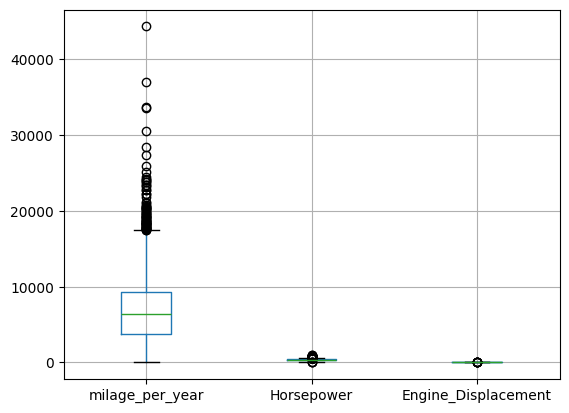

In [874]:
X.boxplot(column=['milage_per_year', 'Horsepower', 'Engine_Displacement'])

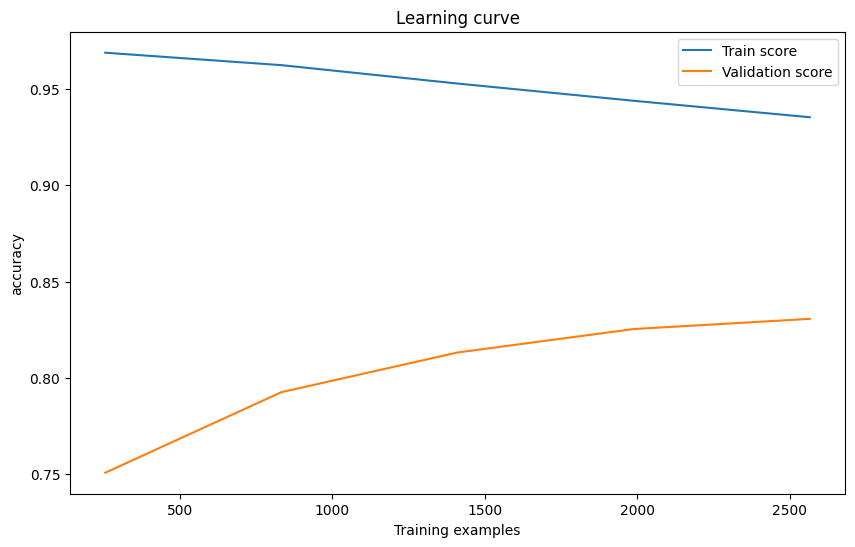

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_cat, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Train score")
plt.plot(train_sizes, test_scores_mean, label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("accuracy")
plt.legend()
plt.title("Learning curve")
plt.show()

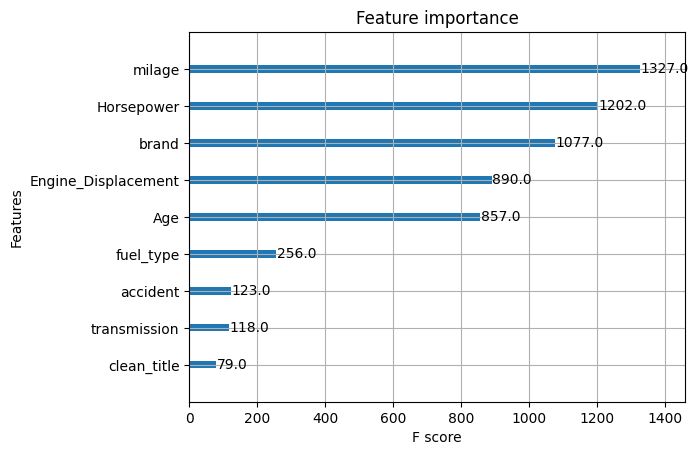

In [688]:
from xgboost import plot_importance

plot_importance(best_model)
plt.show()